[6.79809175e+04 6.59396543e-03 6.38091085e-01]


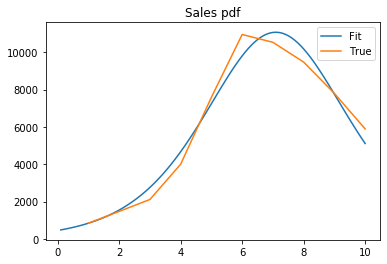

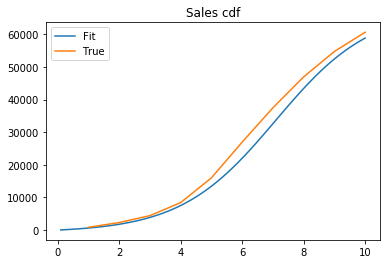

In [1]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
#time intervals
t= np.linspace(1.0, 10.0, num=10)
# sales vector
sales=np.array([840,1470,2110,4000, 7590, 10950, 10530, 9470, 7790, 5890])
# cumulatice sales
c_sales=np.cumsum(sales)
# initial variables(M, P & Q)
vars = [60630, 0.03,0.38]

# residual (error) function
def residual(vars, t, sales):
    M = vars[0]
    P = vars[1]
    Q = vars[2]
    Bass = M * (((P+Q)**2/P)*np.exp(-(P+Q)*t))/(1+(Q/P)*np.exp(-(P+Q)*t))**2 
    return (Bass - (sales))
                 
# non linear least square fitting
varfinal,success = leastsq(residual, vars, args=(t, sales))

# estimated coefficients
m = varfinal[0]
p = varfinal[1]
q = varfinal[2]


print(varfinal)
#sales plot (pdf)
#time interpolation
tp=(np.linspace(1.0, 100.0, num=100))/10
cofactor= np.exp(-(p+q) * tp)
sales_pdf= m* (((p+q)**2/p)*cofactor)/(1+(q/p)*cofactor)**2
plt.plot(tp, sales_pdf,t,sales)
plt.title('Sales pdf')
plt.legend(['Fit', 'True'])
plt.show()


# Cumulative sales (cdf)
sales_cdf= m*(1-cofactor)/(1+(q/p)*cofactor)
plt.plot(tp, sales_cdf,t,c_sales)
plt.title('Sales cdf')
plt.legend(['Fit', 'True'])
plt.show()

## describe

* p: coefficinet of innvotion
* q: coefficient of imitation
* m: potential pool of adapoters